# align DNA part with promoter and RNA part with eRNA. 
<p>In this part, the eRNA-promoter interaction is defined by GRID-seq<p>

In [417]:
import pandas as pd
import subprocess
import os
pd.set_option('display.max_columns', 200)
import pyBigWig
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict as ddict

In [122]:
# # Convert the GRID-seq bam to bed
# bam_list = ['mESC_r1_dna_sort_rmdup.bam', 'mESC_r2_dna_sort_rmdup.bam', 'mESC_r1_rna_sort_rmdup.bam', 'mESC_r2_rna_sort_rmdup.bam']
# for bamfile in bam_list:
#     cmd = f"bedtools bamtobed -i {bamfile} > {bamfile.replace('.bam', '.bed')}"
#     subprocess.run(cmd, shell=True)

# # Filter the r1 unpaired reads
# df_dna = pd.read_csv('mESC_r1_dna_sort_rmdup.bed', sep='\t', header=None)
# df_rna = pd.read_csv('mESC_r1_rna_sort_rmdup.bed', sep='\t', header=None)
# dna_index = df_dna[3].str.split('.').str[1]          # the read index in dna part bam
# df_dna['index'] = dna_index
# rna_index = df_rna[3].str.split('.').str[1]          # the read index in rna part bam
# df_rna['index'] = rna_index
# dna_index_set = set(dna_index.to_list())
# rna_index_set = set(rna_index.to_list())
# index_set = dna_index_set & rna_index_set            # get the read index in both dna part and rna part
# df_dna = df_dna[df_dna['index'].isin(index_set)]
# df_rna = df_rna[df_rna['index'].isin(index_set)]
# df_dna.to_csv('mESC_r1_dna_sort_rmdup_filter.bed', sep='\t', header=None, index=None)     # filter out unpaired reads
# df_rna.to_csv('mESC_r1_rna_sort_rmdup_filter.bed', sep='\t', header=None, index=None)

# # Filter the r2 unpaired reads
# df_dna = pd.read_csv('mESC_r2_dna_sort_rmdup.bed', sep='\t', header=None)
# df_rna = pd.read_csv('mESC_r2_rna_sort_rmdup.bed', sep='\t', header=None)

# dna_index = df_dna[3].str.split('.').str[1]
# df_dna['index'] = dna_index
# rna_index = df_rna[3].str.split('.').str[1]
# df_rna['index'] = rna_index


# dna_index_set = set(dna_index.to_list())
# rna_index_set = set(rna_index.to_list())
# index_set = dna_index_set & rna_index_set
# df_dna = df_dna[df_dna['index'].isin(index_set)]
# df_rna = df_rna[df_rna['index'].isin(index_set)]
# df_dna.to_csv('mESC_r2_dna_sort_rmdup_filter.bed', sep='\t', header=None, index=None)
# df_rna.to_csv('mESC_r2_rna_sort_rmdup_filter.bed', sep='\t', header=None, index=None)

In [418]:
# Get the GRID-seq dna reads which lies in the promoter region, the result bed is: dna_sort_rmdup_filter_promoter_intersectWo.bed
bamfiles = [x for x in os.listdir() if x.endswith('dna_sort_rmdup_filter.bed')]
for bamfile in bamfiles:
    cmd = f"bedtools intersect -a {bamfile} -b promoter.bed -wo > {bamfile.replace('.bed', '_promoter_intersectWo.bed')}"
    subprocess.run(cmd, shell=True)
    
# Get the GRID-seq rna reads which lies in the eRNA region, the result bed is: rna_sort_rmdup_filter_eRNA_intersectWo.bed
bamfiles = [x for x in os.listdir() if x.endswith('rna_sort_rmdup_filter.bed')]
for bamfile in bamfiles:
    cmd = f"bedtools intersect -a {bamfile} -b eRNA.bed -wo >  {bamfile.replace('.bed', '_eRNA_intersectWo.bed')}"
    subprocess.run(cmd, shell=True)

In [419]:
# Get the GRID-seq reads that dna part in promoter region, rna part in eRNA region, the result is df_combine
file_dna = 'mESC_r1_dna_sort_rmdup_filter_promoter_intersectWo.bed'
df_dna = pd.read_csv(file_dna, sep='\t', header=None)
df_dna.columns = ['G_chr_p', 'G_start_p', 'G_stop_p', 'G_name_p', 'G_score_p', 'G_strand_p', 'G_index', 'p_chr', 'p_start', 'p_stop', 'ep_name_p', 'p_score', 'p_strand', 'intersection_length_p']
file_rna = 'mESC_r1_rna_sort_rmdup_filter_eRNA_intersectWo.bed'
df_rna = pd.read_csv(file_rna, sep='\t', header=None)
df_rna.columns = ['G_chr_e', 'G_start_e', 'G_stop_e', 'G_name_e', 'G_score_e', 'G_strand_e', 'G_index', 'e_chr', 'e_start', 'e_stop', 'ep_name_e', 'e_score', 'e_strand', 'intersection_length_e']
df_comebine = pd.merge(df_dna, df_rna, on=['G_index'], how='inner')    # df_comebine is the GRID-seq reads, together with the conected e, p
# df_comebine_r1 = df_comebine[df_comebine['ep_name_e']==df_comebine['ep_name_p']]   # if only want the e and p in constructed epi, use this
df_comebine_r1 = df_comebine

file_dna = 'mESC_r2_dna_sort_rmdup_filter_promoter_intersectWo.bed'
df_dna = pd.read_csv(file_dna, sep='\t', header=None)
df_dna.columns = ['G_chr_p', 'G_start_p', 'G_stop_p', 'G_name_p', 'G_score_p', 'G_strand_p', 'G_index', 'p_chr', 'p_start', 'p_stop', 'ep_name_p', 'p_score', 'p_strand', 'intersection_length_p']
file_rna = 'mESC_r2_rna_sort_rmdup_filter_eRNA_intersectWo.bed'
df_rna = pd.read_csv(file_rna, sep='\t', header=None)
df_rna.columns = ['G_chr_e', 'G_start_e', 'G_stop_e', 'G_name_e', 'G_score_e', 'G_strand_e', 'G_index', 'e_chr', 'e_start', 'e_stop', 'ep_name_e', 'e_score', 'e_strand', 'intersection_length_e']
df_comebine = pd.merge(df_dna, df_rna, on=['G_index'], how='inner')
# df_comebine_r2 = df_comebine[df_comebine['ep_name_e']==df_comebine['ep_name_p']]
df_comebine_r2 = df_comebine

df_combine = pd.concat([df_comebine_r1, df_comebine_r2], axis=0)

In [427]:
# get the intersection between eRNA and TE
cmd = "bedtools intersect -a eRNA.bed -b mm10.SINE.withpPolyaLength_newMethod2.bed -wo -f 0.8 -F 0.8 -e > eRNA_TE_intersectWo.txt"
subprocess.run(cmd, shell=True)

CompletedProcess(args='bedtools intersect -a eRNA.bed -b mm10.SINE.withpPolyaLength_newMethod2.bed -wo -f 0.8 -F 0.8 -e > eRNA_TE_intersectWo.txt', returncode=0)

In [558]:
# combine the df_comebine with te
df_1 = pd.read_csv('eRNA_TE_intersectWo.txt', sep='\t', header=None)
df_1 = df_1[[0,1,2,6,7,8,9,12]]
df_1.columns = ['e_chr', 'e_start', 'e_stop', 'e_SINE_chr', 'e_SINE_start', 'e_SINE_stop', 'e_SINE_name', 'e_SINE_family']

In [559]:
df_combine_eRNA = pd.merge(df_combine, df_1, on = ['e_chr', 'e_start', 'e_stop'])

In [560]:
# Get the in-cis eRNA promoter interaction, get the GRID-seq reads that eRNA and GRID-seq rna part on the same strand
# df_combine_eRNA_filter = df_combine_eRNA[(df_combine_eRNA['G_chr_p']==df_combine_eRNA['G_chr_e']) & (df_combine_eRNA['G_strand_e']==df_combine_eRNA['e_strand'])].copy()
df_combine_eRNA_filter = df_combine_eRNA[(df_combine_eRNA['G_strand_e']==df_combine_eRNA['e_strand'])].copy()

In [561]:
def getBin(row):
    if row['G_start_e'] > row['e_SINE_start'] and row['G_stop_e'] < row['e_SINE_stop']:
        return 0
    binsize = row['e_SINE_stop'] - row['e_SINE_start']
    if row['G_start_e'] < row['e_SINE_start']:
        return np.ceil((row['SINE_median'] - row['G_median']) / binsize) * row['strand']
    elif row['G_stop_e'] > row['e_SINE_stop']:
        return np.floor((row['SINE_median'] - row['G_median']) / binsize) * row['strand']

In [562]:
df_combine_eRNA_filter['SINE_median'] = np.round((df_combine_eRNA_filter['e_SINE_start'] + df_combine_eRNA_filter['e_SINE_stop']) / 2).astype(int)
df_combine_eRNA_filter['G_median'] = np.round((df_combine_eRNA_filter['G_start_e'] + df_combine_eRNA_filter['G_stop_e']) / 2).astype(int)
df_combine_eRNA_filter['distance'] = df_combine_eRNA_filter['SINE_median'] - df_combine_eRNA_filter['G_median']

In [563]:
# calculate mappability
bw = pyBigWig.open('/home/limh/GRIDseq/Mus/1/mappability/mm10_20.bw', 'r')
def get_mappability(row):
    return bw.values(row['G_chr_e'], row['G_start_e'], row['G_stop_e']+1, numpy=True).mean()
    # return bw.values(row[0], row['G_median'], row['G_median']+1, numpy=True).mean()

df_combine_eRNA_filter['mappability'] = df_combine_eRNA_filter.apply(get_mappability, axis=1)
df_combine_eRNA_filter['score_normalized'] = 1 / df_combine_eRNA_filter['mappability']
df_combine_eRNA_filter['score_normalized'] = np.log(df_combine_eRNA_filter['score_normalized'] + 1)
# df_combine_eRNA_filter['score_normalized'] = 1

In [564]:
df_combine_eRNA_filter['strand'] = df_combine_eRNA_filter.apply(lambda x: 1 if x['G_strand_e'] == '+' else -1, axis=1)

<AxesSubplot:ylabel='0'>

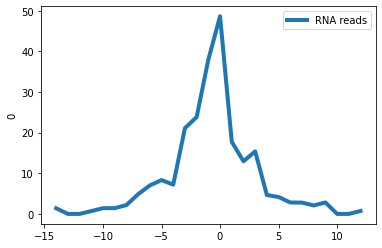

In [500]:
# Plot_method1
bin_size = 100

dis_max = (sine_df['distance'] * sine_df['strand']).max()
dis_min = (sine_df['distance'] * sine_df['strand']).min()

bin_max = np.ceil(dis_max // bin_size)
bin_min = np.floor(dis_min // bin_size)

bin_reads_dict = ddict(float)

    
for i,j,k in sine_df[['score_normalized', 'distance', 'strand']].values:
    bin = int(np.round((j * k) //bin_size))
    bin_reads_dict[bin] += i
    
for i in range(int(bin_min), int(bin_max)+1):
    bin_reads_dict[i] += 0
    

exp_df = pd.DataFrame({int(k):[v] for k,v in bin_reads_dict.items()}).T

sns.lineplot(data=exp_df,  x=exp_df.index, y=exp_df[0], label='RNA reads', linewidth=4)

# plt.xlim(-50//bin_size, 50//bin_size)

In [598]:
# plot_method2
df_combine_eRNA_filter['bin'] = df_combine_eRNA_filter.apply(getBin, axis=1)
sine_df = df_combine_eRNA_filter[df_combine_eRNA_filter['e_SINE_family']=='SINE/ID']

(-10.0, 9.0)

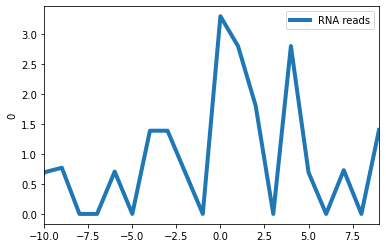

In [599]:
bin_reads_dict = ddict(float)
    
for i,j in sine_df[['score_normalized', 'bin']].values:
    bin = j
    bin_reads_dict[bin] += i
    
bin_min = sine_df['bin'].min()
bin_max = sine_df['bin'].max()

for i in range(int(bin_min), int(bin_max)+1):
    bin_reads_dict[i] += 0
    

exp_df = pd.DataFrame({int(k):[v] for k,v in bin_reads_dict.items()}).T

sns.lineplot(data=exp_df,  x=exp_df.index, y=exp_df[0], label='RNA reads', linewidth=4)

plt.xlim(max(-10, bin_min), min(10, bin_max))

In [580]:
exp_df

,0
4,3.577212
0,1.386294
-3,1.386294
2,0.693147
7,1.386294
-1,2.079442
-2,0.741937
-4,0.693147
3,0.693147
1,0.693147


# MISC

In [484]:
# RIC-seq analysis way
df = df_combine[['G_chr_e', 'G_start_e', 'G_stop_e', 'G_name_e', 'G_score_e', 'G_strand_e']].copy()

In [486]:
# df[[4,5]] record the bin region of each reads
df[4] = np.floor((df['G_start_e'] + df['G_stop_e']) / 2) - 100
df[5] = np.floor((df['G_start_e'] + df['G_stop_e']) / 2) + 100
df[[4,5]] = df[[4,5]].astype(int)


# Record the bin of each reads as bed file
df[['G_chr_e',4,5,'G_name_e', 'G_score_e', 'G_strand_e']].to_csv('mESC_enhancer_0.bed', sep='\t', header=None, index=None)

# Record the flank bin file of each reads
for i in range(-9, 10):
    if i == 0:
        continue
    df[8] = df.apply(lambda x: x[4] - 200 * i if x['G_strand_e']=='-' else x[5] + 200 * (i-1), axis=1)
    df[9] = df.apply(lambda x: x[4] - 200 * (i-1) if x['G_strand_e']=='-' else x[5] + 200 * i, axis=1)
    outfile = f"mESC_enhancer_{i}.bed"
    df[['G_chr_e',8,9, 'G_name_e', 'G_score_e', 'G_strand_e']].to_csv(outfile, sep='\t', header=None, index=None)

# For each bin file, get the intersection number with transposon
for i in range(-9, 10):
    for te in ['B1', 'B2', 'B4', 'ID', 'MIR']:
        file = f"mESC_enhancer_{i}.bed"
        transposon_file = f'mm10.{te}.bed'
        outfile = f"mESC_enhancer_{i}_{te}_intersect.txt"
        cmd = f"bedtools intersect -a {file} -b {transposon_file} -u -f 0.6 -F 0.6 -e > {outfile}"
        subprocess.run(cmd, shell=True)

In [488]:
ratio_dict = dict()
for te in ['B1', 'B2', 'B4', 'ID', 'MIR']:
    ratio_dict[te] = dict()
    for i in range(-9, 10):
        file = f"mESC_enhancer_{i}_{te}_intersect.txt"
        with open(file, 'r') as infile:
            num = len(infile.readlines())
        all_num = 2190
        ratio = num / all_num
        ratio_dict[te][i] = [ratio]

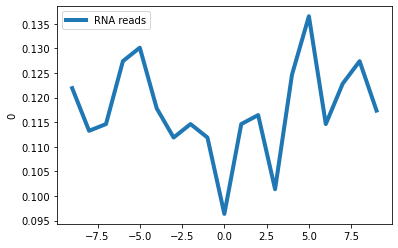

In [498]:
df = pd.DataFrame.from_dict(ratio_dict['B1']).T
fig = sns.lineplot(data=df,  x=df.index, y=df[0], label='RNA reads', linewidth=4)
# plt.xlim((-5, 5))
# plt.ylim((0.03, 0.06))

In [ ]:
# RIC-seq analysis way
df = df_combine[['G_chr_e', 'G_start_e', 'G_stop_e', 'G_name_e', 'G_score_e', 'G_strand_e']].copy()